In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lmfit as lm

In [2]:
data = pd.read_excel("21_12_6 Blast Compiled Data.xlsx",sheet_name="Sheet1")
data

,Time,6_1,6_2,6_3,9_1,9_2,9_3,10_1,10_2,11_1,...,40_1,40_2,41_1,45_1,45_2,45_3,45_4,50_1,50_2,50_3
0,0.00000,21554,25572,25851,16910,23816,18292,19547,16166,29988,...,9108,9981,23949,16031,29464,22299,27465,21175,11901,13498
1,0.33330,22729,26559,26664,17343,24185,18512,19879,18353,30928,...,9482,9883,24359,17834,29889,22211,28994,21460,13313,13707
2,0.66660,22506,27070,26811,17531,24902,19203,20996,18392,30348,...,11069,11049,25026,18985,30982,27146,30065,22043,13171,13906
3,1.00000,23402,27209,27258,18638,26232,19676,20982,19542,31943,...,10924,11254,25624,19373,32177,27315,29285,22197,14078,15026
4,1.33330,23390,27355,27886,19126,26899,18375,21245,20381,31583,...,12768,12092,24741,19456,31692,28529,29310,22164,14305,14477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,59.99938,60265,112881,155192,142391,119940,129535,154049,75514,173664,...,119173,89660,84359,141965,183388,248484,147469,72841,107686,101874
181,60.33271,55939,112712,156340,143045,120565,129748,145289,79994,175537,...,119473,89834,84707,141517,184914,249730,150546,73284,107073,103722
182,60.66604,56535,112630,155118,143954,120342,132363,147329,77424,177001,...,121459,90470,84728,142361,184787,254650,149200,72835,106361,105426
183,60.99937,58369,113214,158138,143860,120427,134480,145281,78948,177975,...,123171,92285,85206,145720,188027,253785,150906,72999,108991,108710


In [4]:
col = list(data.columns)
col.remove('Time')
col

['6_1',
 '6_2',
 '6_3',
 '9_1',
 '9_2',
 '9_3',
 '10_1',
 '10_2',
 '11_1',
 '12_1',
 '12_2',
 '13_1',
 '14_1',
 '15_1',
 '15_2',
 '16_1',
 '17_1',
 '19_1',
 '20_1',
 '20_2',
 '20_3',
 '22_1',
 '22_2',
 '23_1',
 '23_2',
 '23_3',
 '24_1',
 '24_2',
 '24_3',
 '25_1',
 '25_2',
 '26_1',
 '26_2',
 '27_1',
 '28_1',
 '28_2',
 '28_3',
 '30_1',
 '30_2',
 '31_1',
 '31_2',
 '31_3',
 '33_1',
 '33_2',
 '34_1',
 '34_2',
 '34_3',
 '34_4',
 '35_1',
 '35_2',
 '36_1',
 '39_1',
 '39_2',
 '40_1',
 '40_2',
 '41_1',
 '45_1',
 '45_2',
 '45_3',
 '45_4',
 '50_1',
 '50_2',
 '50_3']

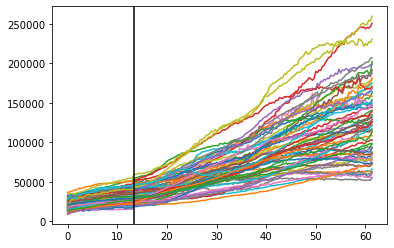

In [11]:
time = data["Time"]
for idx in col:
    plt.plot(time,data[idx])
plt.axvline(x=13.3,color="k")

In [6]:
datanp = data.to_numpy()[:,2:].astype('float64')
datanp

array([[ 25572.,  25851.,  16910., ...,  21175.,  11901.,  13498.],
       [ 26559.,  26664.,  17343., ...,  21460.,  13313.,  13707.],
       [ 27070.,  26811.,  17531., ...,  22043.,  13171.,  13906.],
       ...,
       [112630., 155118., 143954., ...,  72835., 106361., 105426.],
       [113214., 158138., 143860., ...,  72999., 108991., 108710.],
       [113593., 162769., 144282., ...,  73556., 108180., 112905.]])

In [7]:
data_mean = np.mean(datanp,axis=1)
data_std = np.std(datanp,axis=1)
data_mean.size

185

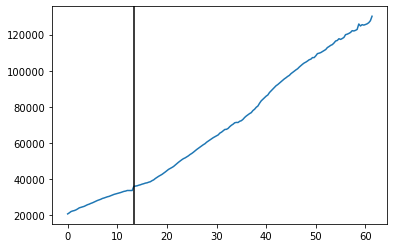

In [9]:
plt.plot(time,data_mean)
plt.axvline(x=13.3,color="k")

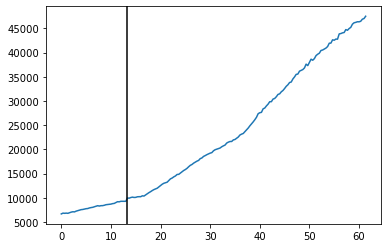

In [10]:
plt.plot(time,data_std)
plt.axvline(x=13.3,color="k")

In [12]:
data_ill = data[data['Time']>13]
time_ill = data_ill["Time"]-13.3
data_illnp = data_ill.to_numpy()[:,2:].astype('float64')
data_illnp

array([[ 47239.,  52036.,  50311., ...,  29541.,  23335.,  29258.],
       [ 47029.,  49741.,  50679., ...,  29550.,  24263.,  28933.],
       [ 47121.,  49596.,  52448., ...,  29397.,  24686.,  28517.],
       ...,
       [112630., 155118., 143954., ...,  72835., 106361., 105426.],
       [113214., 158138., 143860., ...,  72999., 108991., 108710.],
       [113593., 162769., 144282., ...,  73556., 108180., 112905.]])

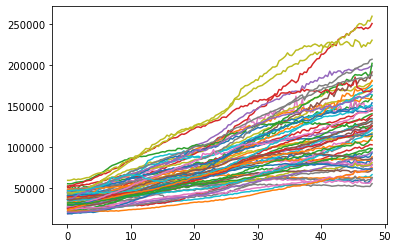

In [13]:
for idx in col:
    plt.plot(time_ill,data_ill[idx])


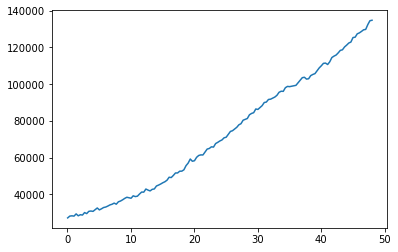

In [36]:
datay = data_illnp[:,4]
noise = np.sqrt(np.abs(datay))
plt.plot(time_ill,datay)

In [20]:
def DE(t, m, k, beta, delta,offset):
    """General expression model function"""

    f1 = np.exp(- (beta + k) * t) / (beta - delta + k)
    f2 = - np.exp(- beta * t) / (beta - delta)
    f3 = k * np.exp(- delta * t) / (beta - delta) / (beta - delta + k)

    f = (f1 + f2 + f3) * m

    return f + offset

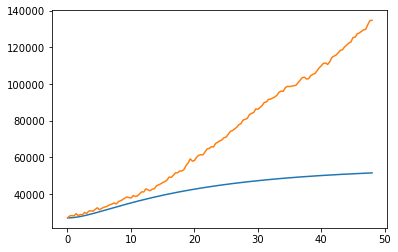

In [39]:
m_ktl_0 = 1600

tr_0 = 4.5
kmr_0 = 0.3
betr_0 = 0.05
deltr_0 = 0.0
offr_0 = 27000

y1 = DE(time_ill,m_ktl_0,kmr_0,betr_0,deltr_0,offr_0)
plt.plot(time_ill,y1)
plt.plot(time_ill,datay)
#print(t,y)

In [40]:
DE_model = lm.Model(DE)
pars = DE_model.make_params()
pars['m'].set(value=m_ktl_0,vary=True)
pars['k'].set(value=kmr_0,vary=False)
pars['beta'].set(value=betr_0,vary=False)
pars['delta'].set(value=deltr_0,vary=True)
pars['offset'].set(value=offr_0,vary=True)

out = DE_model.fit(datay, pars, t=time_ill, weights=1/noise)
print(out.fit_report(min_correl=0.25))

[[Model]]
    Model(DE)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 30
    # data points      = 145
    # variables        = 3
    chi-square         = 15046.3076
    reduced chi-square = 105.959912
    Akaike info crit   = 679.112352
    Bayesian info crit = 688.042553
[[Variables]]
    m:       2448.72930 +/- 57.8674326 (2.36%) (init = 1600)
    k:       0.3 (fixed)
    beta:    0.05 (fixed)
    delta:  -0.03367632 +/- 7.7129e-04 (2.29%) (init = 0)
    offset:  25706.9499 +/- 393.724215 (1.53%) (init = 27000)
[[Correlations]] (unreported correlations are < 0.250)
    C(m, delta)      =  0.955
    C(m, offset)     = -0.781
    C(delta, offset) = -0.644


Text(0, 0.5, '# of GFP')

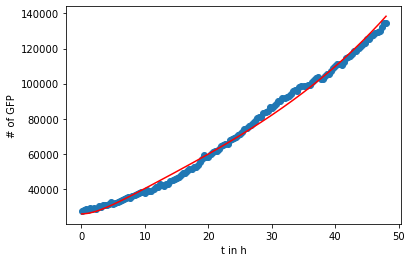

In [41]:
plt.plot(time_ill,datay,"o")
plt.plot(time_ill, out.best_fit, 'r-')
plt.xlabel("t in h")
plt.ylabel("# of GFP")
#plt.savefig("lq-fitted.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")